In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [19]:
data=pd.read_csv('titanic_train.csv')

In [20]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.shape

(891, 12)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
data.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [25]:
print("Number of missing values for each colums:")
print("Age:", data["Age"].isnull().sum())
print("Cabin:", data["Cabin"].isnull().sum())
print("Embarked:", data["Embarked"].isnull().sum())

Number of missing values for each colums:
Age: 177
Cabin: 687
Embarked: 2


In [26]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data[['Cabin','Embarked']]= data[['Cabin','Embarked']].ffill()

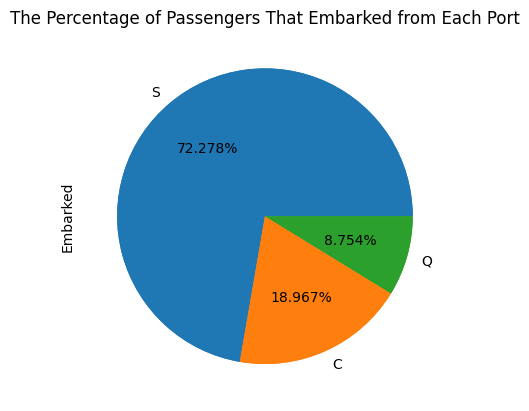

In [29]:
sizes=data['Embarked'].value_counts()
data['Embarked'].value_counts().plot.pie()
plt.pie(sizes, autopct='%.3f%%')
plt.title("The Percentage of Passengers That Embarked from Each Port")
plt.show()

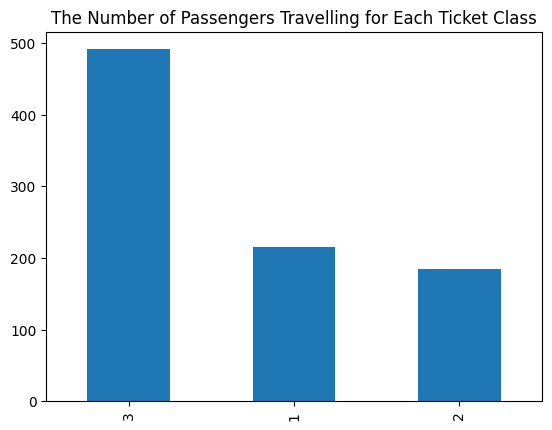

In [30]:
sizes=data['Pclass'].value_counts()
data['Pclass'].value_counts().plot.bar()
plt.bar(sizes, 0, 0, 0)
plt.title("The Number of Passengers Travelling for Each Ticket Class")
plt.show()

In [31]:
pd.crosstab(index=data['Sex'], columns=data['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


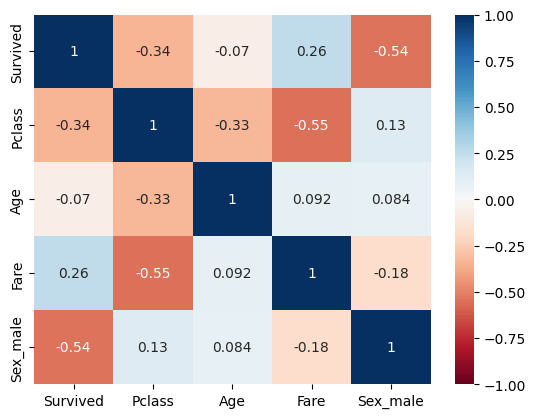

In [34]:
cols = ["Survived", "Pclass", "Sex", "Age", "Fare"]

df_encoded = pd.get_dummies(data[cols], columns=["Sex"], drop_first=True)
df_corr = df_encoded.corr()
sns.heatmap(df_corr, cmap='RdBu', vmin=-1, vmax=1,annot=True)
plt.show()

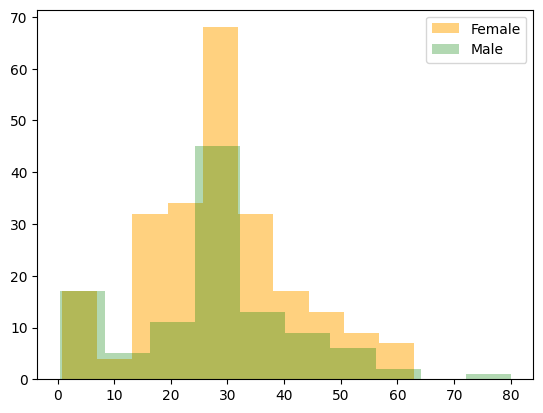

In [35]:
df2=data[data["Survived"].isin([1])] 
df3=df2[df2["Sex"].isin(["female"])]
df4=df2[df2["Sex"].isin(["male"])]


plt.hist(df3["Age"], 
         alpha=0.5, 
         label='Female',
         color='orange')
plt.hist(df4["Age"], 
         alpha=0.3,
         label='Male',
         color='green')
plt.legend(loc='upper right')  
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
def feature_encoding(df,cols):
    for col in cols:
        le=LabelEncoder()
        df[col]=le.fit_transform(df[col])
    return df
    
cols=['Sex','Embarked']
data=feature_encoding(data,cols)

In [38]:
data=data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [40]:
# co - relation matrix table
corr=data.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.172726
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.168430
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.113807
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.032025
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.070111
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.041732
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.228364
Embarked,-0.172726,0.168430,0.113807,-0.032025,0.070111,0.041732,-0.228364,1.000000


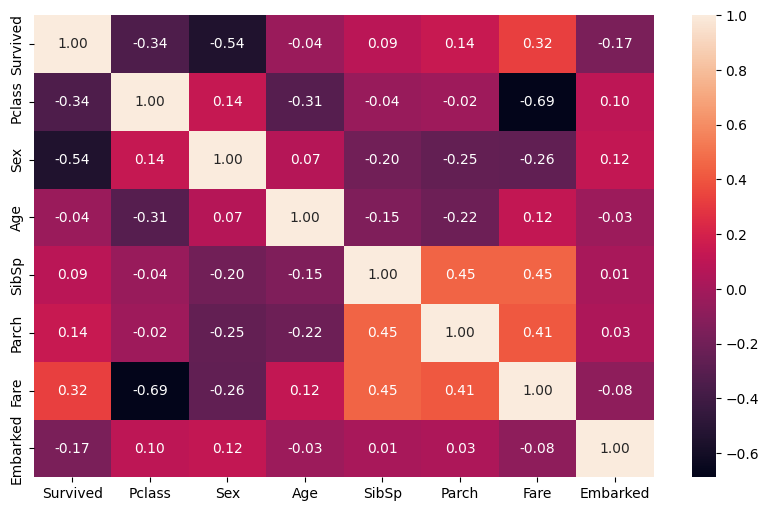

In [41]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(data=data.corr(method='spearman'), annot=True, fmt='.2f')


In [44]:
from sklearn.preprocessing import MinMaxScaler

def feature_scaling(df,cols):
    scaler = MinMaxScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])
    return df

In [45]:
numerical_features=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']
data=feature_scaling(data,numerical_features)

In [46]:
X = data.drop('Survived', axis = 1)
y = data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

## Taining a Model

In [53]:
def evaluation_fn(best_model,X_test,Y_test):
    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test)
    print(classification_report(Y_test, y_pred))

    print('Accuracy of the model is:',accuracy_score(Y_test, y_pred))

In [54]:
model = DecisionTreeClassifier(random_state=17)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_
evaluation_fn(best_model,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       106
           1       0.82      0.58      0.68        73

    accuracy                           0.78       179
   macro avg       0.79      0.75      0.75       179
weighted avg       0.78      0.78      0.77       179

Accuracy of the model is: 0.776536312849162


In [55]:
# Random Forest Classifier with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=17)
param_grid_rf = {
    'n_estimators': [60,100, 120, 150],
    'max_depth': [3, 5, 7,],
    'min_samples_split': [2, 5, 10],
}
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, Y_train)
best_rf_model = grid_search_rf.best_estimator_
print("Random Forest Classifier:")
evaluation_fn(best_rf_model, X_test, Y_test)

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       106
           1       0.81      0.70      0.75        73

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

Accuracy of the model is: 0.8100558659217877


In [56]:
# Built-in feature importance (Gini Importance)
importances = best_rf_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

    Feature  Gini Importance
1       Sex         0.383314
5      Fare         0.191647
2       Age         0.150845
0    Pclass         0.126512
3     SibSp         0.057118
6  Embarked         0.047569
4     Parch         0.042995


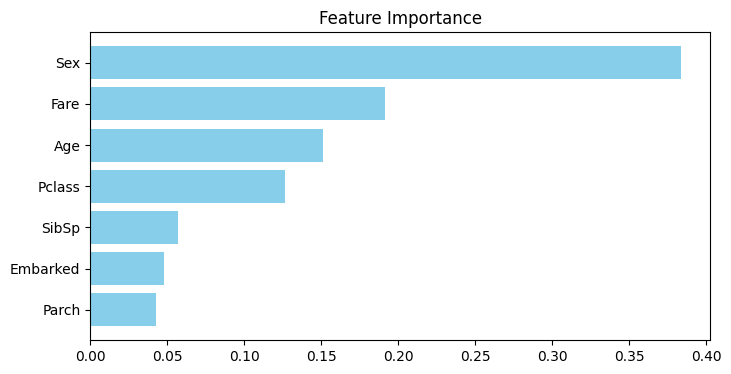

In [58]:
# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Gini Importance'], color='skyblue')
plt.title('Feature Importance')
plt.gca().invert_yaxis() 
plt.show()

In [60]:
X_train.drop(columns=['SibSp','Embarked','Parch'],axis=1,inplace=True)
X_test.drop(columns=['SibSp','Embarked','Parch'],axis=1,inplace=True)

In [ ]:
# dropping less importnat feature

In [61]:
# Random Forest Classifier with hyperparameter tuning
rf_model = RandomForestClassifier(random_state=17)

rf_model.fit(X_train, Y_train)
print("Random Forest Classifier:")
evaluation_fn(rf_model, X_test, Y_test)

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       106
           1       0.76      0.75      0.76        73

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Accuracy of the model is: 0.8044692737430168


## finally the rf model is best for survival prediction